# モザイク処理

## OpenCVを使ってモザイクをかける

In [1]:
import cv2

def mosaic(img, rect, size):
    # モザイクをかける領域を取得
    (x1, y1, x2, y2) = rect
    w = x2 - x1
    h = y2 - y1
    i_rect = img[y1:y2, x1:x2]

    # 一度拡大して縮小
    i_small = cv2.resize(i_rect, (size, size))
    i_mos = cv2.resize(i_small, (w, h), interpolation=cv2.INTER_AREA)

    # 画像にモザイク画像を重ねる
    img2 = img.copy()
    img2[y1:y2, x1:x2] = i_mos
    return img2

cv2.resize()のinterpolation=cv2.INTER_AREAは画像を元の画像の領域からピクセルを選択し, あ新しいサイズのピクセルに対応するように合成する.

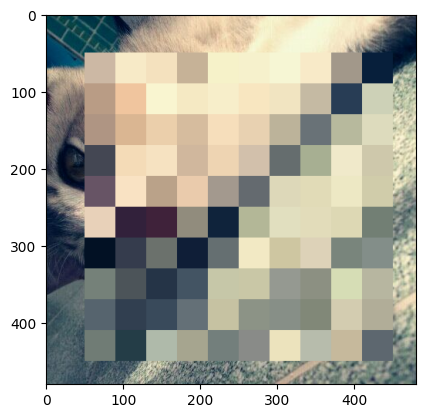

In [3]:
import matplotlib.pyplot as plt
import cv2

# 画像を読み込んでモザイクをかける
img = cv2.imread("../images/cat.jpg")
mos = mosaic(img, (50, 50, 450, 450), 10)

cv2.imwrite("../images/cat-mosaic.png", mos)
plt.imshow(cv2.cvtColor(mos, cv2.COLOR_BGR2RGB))
plt.show()

## 人間の顔に自動でモザイクをかける

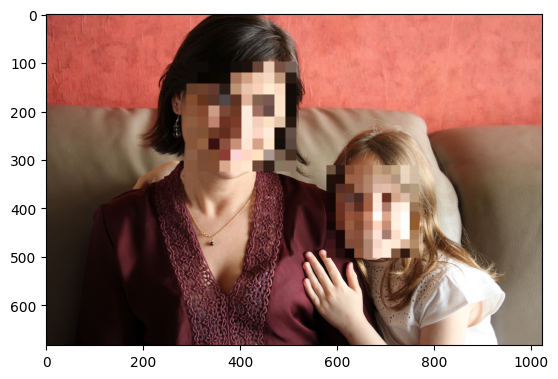

In [6]:
import matplotlib.pyplot as  plt
import cv2

# カスケードファイルを指定して分類機を作成
cascade_file = "../dataset/haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)


# 画像をグレースケールに変換
img = cv2.imread("../images/family.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 顔検出を実行
face_list = cascade.detectMultiScale(img_gray, minSize=(150, 150))
if not len(face_list):
    quit()

# モザイク処理
for (x, y, w, h) in face_list:
    img = mosaic(img, (x, y, x+w, y+h), 10)

# 出力
cv2.imwrite("../images/family-mosaic-output.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()



OpenCVの顔検出は横向きや傾きに弱いため注意が必要

## 回転の検出

---0---
顔の座標= 319 308 405 405
---10---
顔の座標= 394 385 409 409
---20---
顔の座標= 451 444 408 408
---30---
顔の座標= 494 483 409 409
---40---
---50---
---60---
---70---
---80---


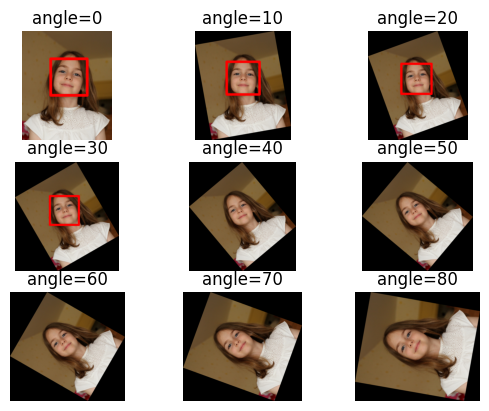

In [10]:
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage

# 検出器の読み込み
cascade_file = "../dataset/haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

# 画像の読み込み
img = cv2.imread("../images/girl.jpg")

# 顔検出
def face_detect(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_list = cascade.detectMultiScale(img_gray, minSize=(300, 300))

    for (x, y, w, h) in face_list:
        print("顔の座標=", x, y, w, h)
        red = (0, 0, 255)
        cv2.rectangle(img, (x, y), (x+w, y+h), red, thickness=30)

for i in range(0, 9):
    ang = i * 10
    print("---" + str(ang) + "---")
    img_r = ndimage.rotate(img, ang)
    face_detect(img_r)
    plt.subplot(3, 3, i + 1)
    plt.axis("off")
    plt.title("angle=" + str(ang))
    plt.imshow(cv2.cvtColor(img_r, cv2.COLOR_RGB2BGR))

plt.show()